In [61]:
import requests
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
from scipy.cluster.vq import whiten, kmeans2

In [90]:
def call_api(uri, result_key):
    json = {}
    params = {'season': '2016'}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0'},
                           params = params).json()
        return json[result_key]
    except:
        pprint(json)
        return None

In [102]:
params = {'season': '2016'}
table = call_api('http://api.football-data.org/v1/competitions/426/leagueTable', 'standing', params)
pprint(table)

[{'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/61'}},
  'away': {'draws': 3,
           'goals': 30,
           'goalsAgainst': 16,
           'losses': 3,
           'wins': 13},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/5/5c/Chelsea_crest.svg',
  'draws': 3,
  'goalDifference': 52,
  'goals': 85,
  'goalsAgainst': 33,
  'home': {'draws': 0,
           'goals': 55,
           'goalsAgainst': 17,
           'losses': 2,
           'wins': 17},
  'losses': 5,
  'playedGames': 38,
  'points': 93,
  'position': 1,
  'teamName': 'Chelsea FC',
  'wins': 30},
 {'_links': {'team': {'href': 'http://api.football-data.org/v1/teams/73'}},
  'away': {'draws': 6, 'goals': 39, 'goalsAgainst': 17, 'losses': 4, 'wins': 9},
  'crestURI': 'http://upload.wikimedia.org/wikipedia/de/b/b4/Tottenham_Hotspur.svg',
  'draws': 8,
  'goalDifference': 60,
  'goals': 86,
  'goalsAgainst': 26,
  'home': {'draws': 2, 'goals': 47, 'goalsAgainst': 9, 'losses': 0, 'wins': 17},
  'los

In [103]:
for team in table:
    goals = team['goals']
    losses = team['losses']
    print('Team "{}", {} losses, {} goals'.format(team['teamName'], losses, goals))

Team "Chelsea FC", 5 losses, 85 goals
Team "Tottenham Hotspur FC", 4 losses, 86 goals
Team "Manchester City FC", 6 losses, 80 goals
Team "Liverpool FC", 6 losses, 78 goals
Team "Arsenal FC", 9 losses, 77 goals
Team "Manchester United FC", 5 losses, 54 goals
Team "Everton FC", 11 losses, 62 goals
Team "Southampton FC", 16 losses, 41 goals
Team "AFC Bournemouth", 16 losses, 55 goals
Team "West Bromwich Albion FC", 17 losses, 43 goals
Team "West Ham United FC", 17 losses, 47 goals
Team "Leicester City FC", 18 losses, 48 goals
Team "Stoke City FC", 16 losses, 41 goals
Team "Crystal Palace FC", 21 losses, 50 goals
Team "Swansea City FC", 21 losses, 45 goals
Team "Burnley FC", 20 losses, 39 goals
Team "Watford FC", 20 losses, 40 goals
Team "Hull City FC", 22 losses, 37 goals
Team "Middlesbrough FC", 20 losses, 27 goals
Team "Sunderland AFC", 26 losses, 29 goals


In [118]:
team_for_pd = []
for team in table:
    team_for_pd.append({'losses': team['losses'], 'goals': team['goals']})
team_for_pd
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,goals,losses
0,85,5
1,86,4
2,80,6
3,78,6
4,77,9
5,54,5
6,62,11
7,41,16
8,55,16
9,43,17


In [110]:
whitened = whiten(teams_pd.as_matrix())
whitened

array([[ 4.70655975,  0.75757576],
       [ 4.76193104,  0.60606061],
       [ 4.42970329,  0.90909091],
       [ 4.31896071,  0.90909091],
       [ 4.26358942,  1.36363636],
       [ 2.99004972,  0.75757576],
       [ 3.43302005,  1.66666667],
       [ 2.27022294,  2.42424242],
       [ 3.04542102,  2.42424242],
       [ 2.38096552,  2.57575758],
       [ 2.60245069,  2.57575758],
       [ 2.65782198,  2.72727273],
       [ 2.27022294,  2.42424242],
       [ 2.76856456,  3.18181818],
       [ 2.4917081 ,  3.18181818],
       [ 2.15948036,  3.03030303],
       [ 2.21485165,  3.03030303],
       [ 2.04873777,  3.33333333],
       [ 1.49502486,  3.03030303],
       [ 1.60576744,  3.93939394]])

In [111]:
centroids, cluster_map = kmeans2(whitened, 3)
centroids, cluster_map

(array([[ 4.12911629,  0.995671  ],
        [ 1.71651003,  3.43434343],
        [ 2.48617097,  2.75757576]]),
 array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1]))

In [112]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'g',
 'g',
 'g']

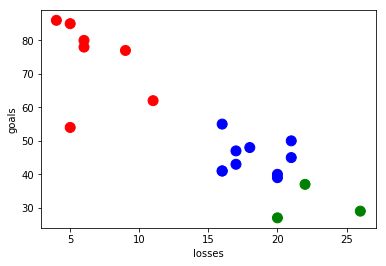

In [113]:
teams_pd.plot.scatter(x='losses', y='goals', c=colors, s=100)

In [114]:
centroids, cluster_map = kmeans2(whitened, 5)
centroids, cluster_map

C:\ProgramData\Anaconda3\lib\site-packages\scipy\cluster\vq.py:660: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 3.21153489,  1.21212121],
        [ 3.04542102,  2.42424242],
        [ 2.42403208,  2.79461279],
        [ 1.71651003,  3.43434343],
        [ 4.49614884,  0.90909091]]),
 array([4, 4, 4, 4, 4, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3]))

In [115]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
colors

['m',
 'm',
 'm',
 'm',
 'm',
 'r',
 'r',
 'b',
 'g',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'b',
 'y',
 'y',
 'y']

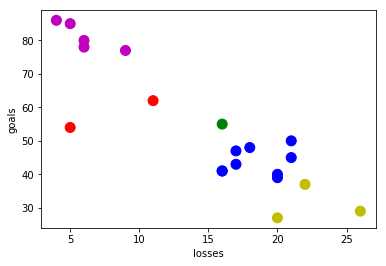

In [116]:
teams_pd.plot.scatter(x='losses', y='goals', c=colors, s=100)

In [123]:
params = {'season': '2016'}
year = 2016
table = call_api('http://api.football-data.org/v1/competitions/426/leagueTable', 'standing', params)
for team in table:
    losses = team['losses']
    players = call_api(team['_links']['team']['href']+'/players', 'players', params)
    players_under_23 = 0
    for player in players:
        age = year - int(player['dateOfBirth'][:4])
        if age < 23:
            players_under_23 += 1
    print('Team "{}", {} players under 23, {} losses'.format(team['teamName'], players_under_23, losses))
    team['players_u_23'] = players_under_23

Team "Chelsea FC", 7 players under 23, 5 losses
Team "Tottenham Hotspur FC", 8 players under 23, 4 losses
Team "Manchester City FC", 6 players under 23, 6 losses
Team "Liverpool FC", 8 players under 23, 6 losses
Team "Arsenal FC", 4 players under 23, 9 losses
Team "Manchester United FC", 6 players under 23, 5 losses
Team "Everton FC", 5 players under 23, 11 losses
Team "Southampton FC", 9 players under 23, 16 losses
Team "AFC Bournemouth", 7 players under 23, 16 losses
Team "West Bromwich Albion FC", 4 players under 23, 17 losses
Team "West Ham United FC", 2 players under 23, 17 losses
Team "Leicester City FC", 5 players under 23, 18 losses
Team "Stoke City FC", 2 players under 23, 16 losses
Team "Crystal Palace FC", 0 players under 23, 21 losses
Team "Swansea City FC", 5 players under 23, 21 losses
Team "Burnley FC", 0 players under 23, 20 losses
Team "Watford FC", 2 players under 23, 20 losses
Team "Hull City FC", 2 players under 23, 22 losses
Team "Middlesbrough FC", 4 players under

In [124]:
team_for_pd = []
for team in table:
    team_for_pd.append({'losses': team['losses'], 'players_under_23': team['players_u_23']})
team_for_pd
teams_pd = pd.DataFrame(team_for_pd)
teams_pd

,losses,players_under_23
0,5,7
1,4,8
2,6,6
3,6,8
4,9,4
5,5,6
6,11,5
7,16,9
8,16,7
9,17,4


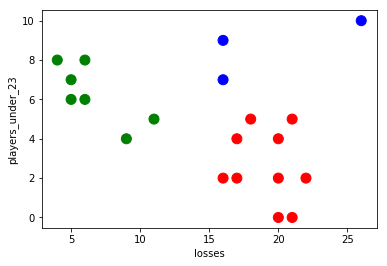

In [125]:
whitened = whiten(teams_pd.as_matrix())
centroids, cluster_map = kmeans2(whitened, 3)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='losses', y='players_under_23', c=colors, s=100)

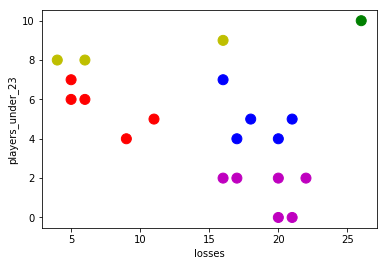

In [126]:
whitened = whiten(teams_pd.as_matrix())
centroids, cluster_map = kmeans2(whitened, 5)
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]
teams_pd.plot.scatter(x='losses', y='players_under_23', c=colors, s=100)